### KNN

* K-Nearest Neighbour is one of the simplest Machine Learning algorithms based on Supervised Learning technique.
* K-NN algorithm assumes the similarity between the new case/data and available cases and put the new case into the category that is most similar to the available categories.
* K-NN algorithm stores all the available data and classifies a new data point based on the similarity. This means when new data appears then it can be easily classified into a well suite category by using K- NN algorithm.
* K-NN algorithm can be used for Regression as well as for Classification but mostly it is used for the Classification problems.

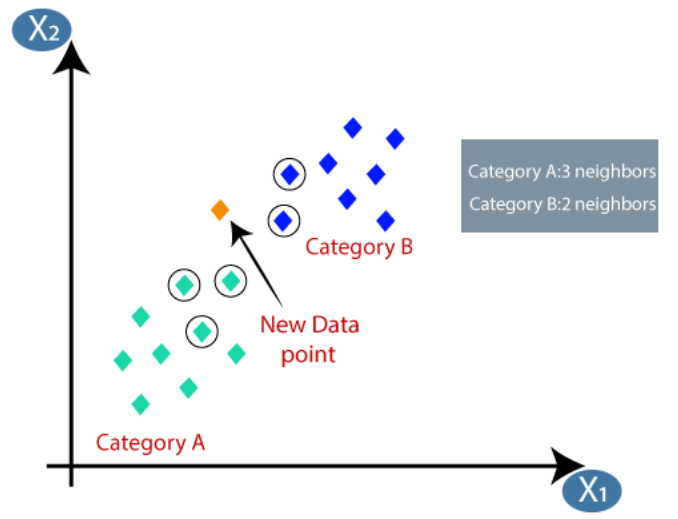

**Scikit-learn is a very popular Machine Learning library for Python. In this kernel let us use it to build a machine learning model using k-Nearest Neighbors algorithm to predict whether the patients in the "Pima Indians Diabetes Dataset" have diabetes or not.**

In [20]:
#Load the necessary python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# plt.style.use('ggplot')

In [39]:
#Load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv')

#Print the first 5 rows of the dataframe.
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [99]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

Dataset is somewhere **imbalanced**.

In [40]:
#Let's observe the shape of the dataframe.
df.shape

(768, 9)

As observed above we have 768 rows and 9 columns. The first 8 columns represent the features and the last column represent the target/label. 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies          

no null values

In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [17]:
features = df.drop('Outcome',axis=1).columns
features

Index(['Pregnancies',
       'Glucose',
       'BloodPressure',
       'SkinThickness',
       'Insulin',
       'BMI',
       'DiabetesPedigreeFunction',
       'Age'],
      dtype='object')

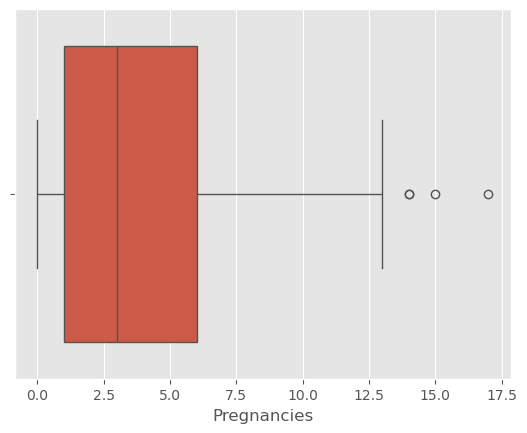

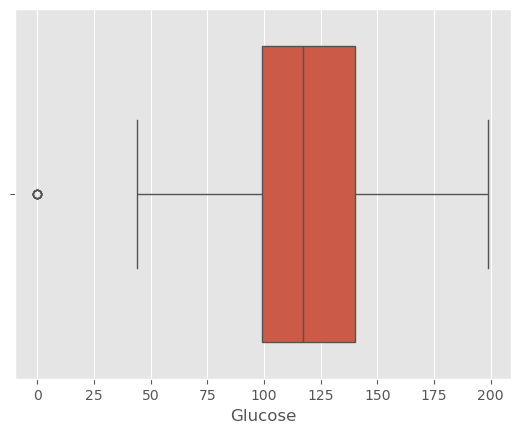

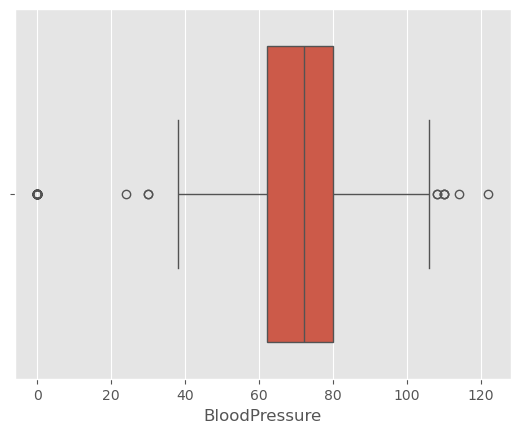

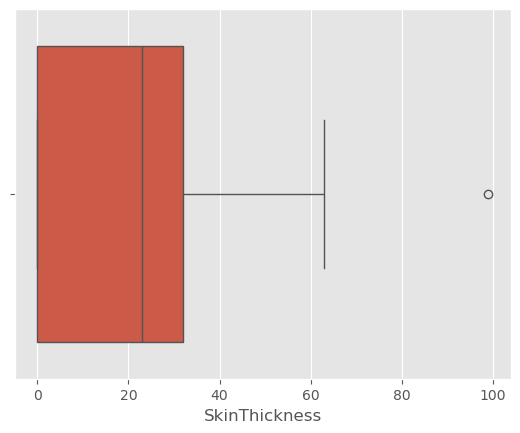

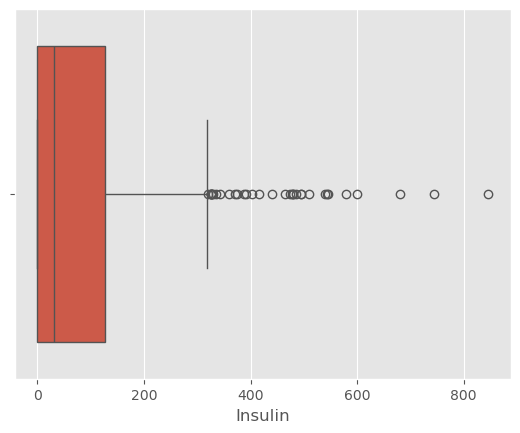

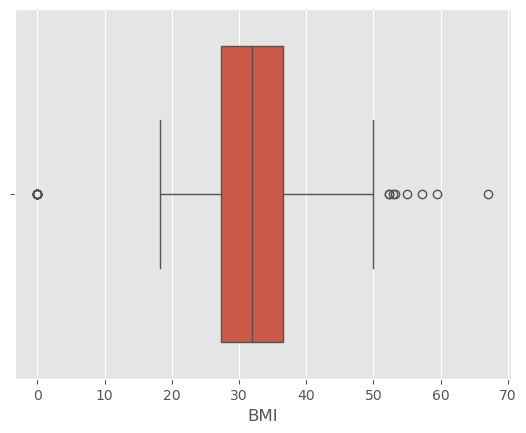

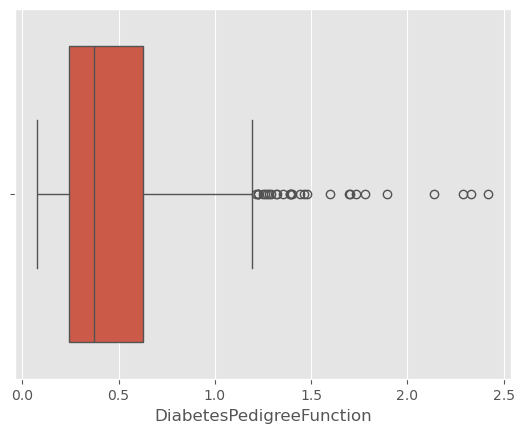

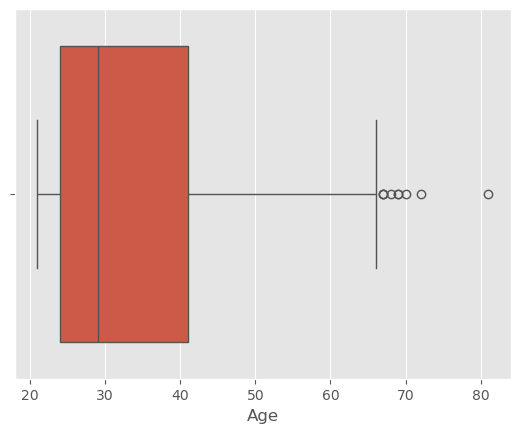

In [21]:
# checking outliers
for i in features:
    sns.boxplot(data=df, x=i)
    plt.show()

In [122]:
df[df['Insulin'] > 250]['Insulin'].count()

56

In [101]:
df[df['DiabetesPedigreeFunction']>1.18]['DiabetesPedigreeFunction'].count()

32

In [102]:
df[df['BMI'] > 50]['BMI'].count()

8

In [103]:
df[df['SkinThickness'] > 70]['SkinThickness'].count()

1

We can remove 56, 32 and 8 rows from 768 rows, as these are outliers.

In [123]:
df2 = df[(df['Insulin'] < 250) & (df['DiabetesPedigreeFunction'] < 1.15) & (df['BMI'] < 50) & (df['SkinThickness'] < 70)].reset_index(drop=True)

In [124]:
df2

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
667,10,101,76,48,180,32.9,0.171,63,0
668,2,122,70,27,0,36.8,0.340,27,0
669,5,121,72,23,112,26.2,0.245,30,0
670,1,126,60,0,0,30.1,0.349,47,1


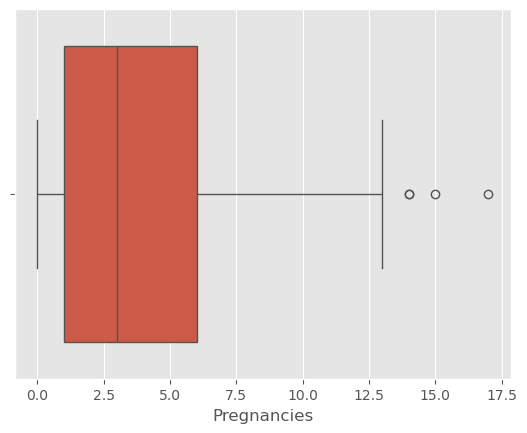

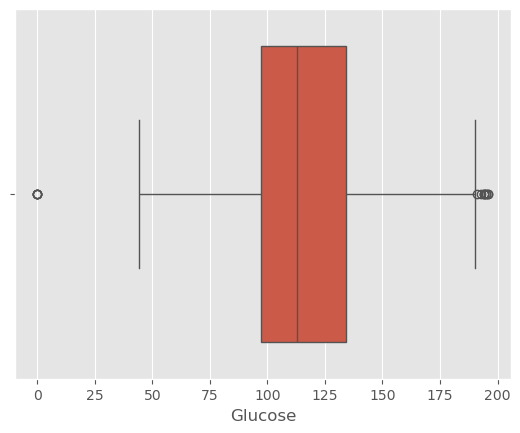

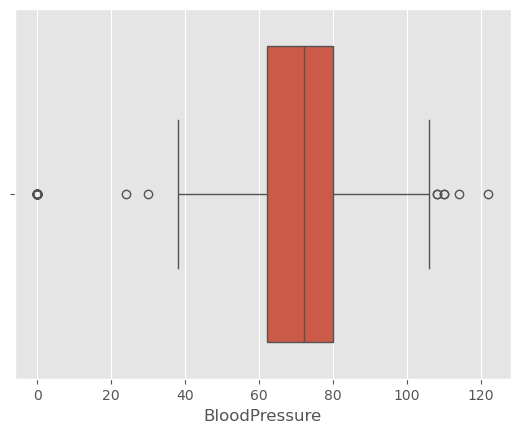

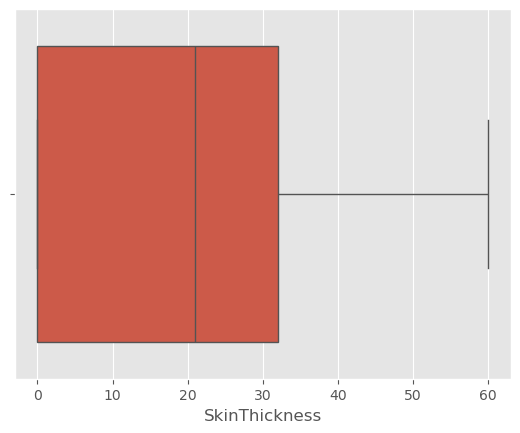

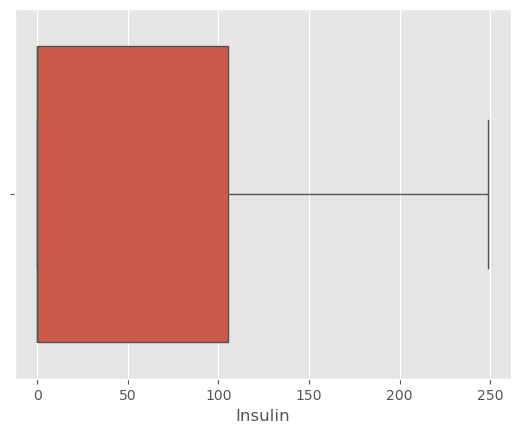

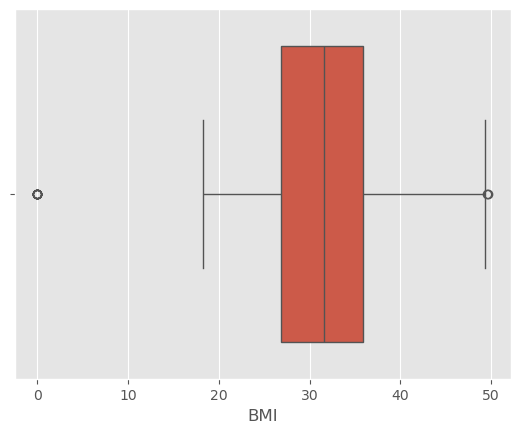

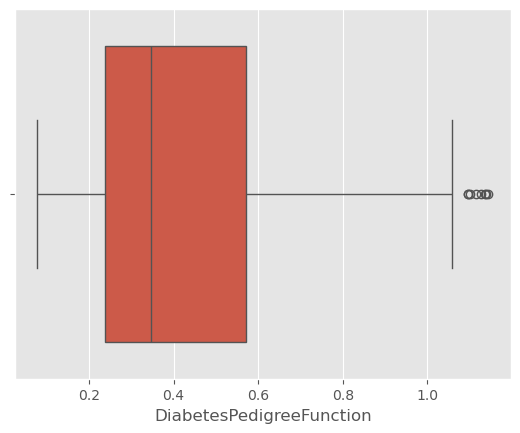

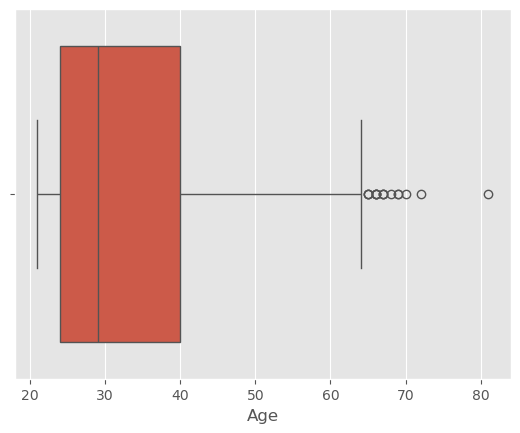

In [125]:
for i in features:
    sns.boxplot(data=df2, x=i)
    plt.show()

After removing outliers, Let's split the data randomly into training and test set. 

We will fit/train a classifier on the training set and make predictions on the test set. Then we will compare the predictions with the known labels.

Scikit-learn provides facility to split data into train and test set using train_test_split method.

In [126]:
#Let's create numpy arrays for features and target
x = df2.drop('Outcome',axis=1).values
y = df2['Outcome'].values

In [127]:
#importing train_test_split
from sklearn.model_selection import train_test_split

It is a best practice to perform our split in such a way that out split reflects the labels in the data. In other words, we want labels to be split in train and test set as they are in the original dataset. So we use the stratify argument.

Also we create a test set of size of about 40% of the dataset.

In [128]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42, stratify=y)

Let's create a classifier using k-Nearest Neighbors algorithm.

First let us first observe the accuracies for different values of k.

In [129]:
#import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(x_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(x_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(x_test, y_test) 

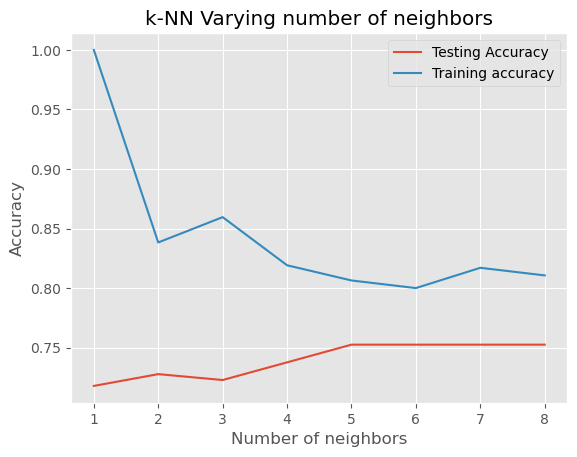

In [130]:
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

We can observe above that we get maximum testing accuracy and a good training accuracy at k=7. So lets create a KNeighborsClassifier with number of neighbors as 7.

In [131]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=7)

In [132]:
#Fit the model
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [133]:
#Get accuracy. Note: In case of classification algorithms score method represents accuracy.
knn.score(x_test,y_test)

0.7524752475247525

**Confusion Matrix**

A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known. Scikit-learn provides facility to calculate confusion matrix using the confusion_matrix method.

In [134]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix

In [135]:
#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(x_test)

In [136]:
confusion_matrix(y_test,y_pred)

array([[116,  22],
       [ 28,  36]])

Considering confusion matrix above:

True negative = 116

False positive = 22

True postive = 36

Fasle negative = 28


Confusion matrix can also be obtained using crosstab method of pandas.

In [137]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,116,22,138
1,28,36,64
All,144,58,202
